In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import time

In [37]:
#Libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
#Libraries for formattting and handling text 
import string 
import re
#Library for nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
# from wordcloud import WordCloud, STOPWORDS
#Library for Splitting Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
#Libraries for NN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.utils import plot_model
#Library for evaluation
from sklearn import metrics
from functools import reduce
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# Parameter

In [38]:
config = {
    'max_features': 21577,
    'pad_len': 25,
    'embed_dim': 256,
    'lstm_out': 128,
    'dropout': 0.1,
    'LSTM_dropout': 0.1,
    'recurrent_dropout': 0.4,
    'learning_rate': 0.0001,
    'epochs': 10,
    'batch_size': 16,
}

# Dataset

In [39]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
test_data_target = pd.read_csv('./test_ans.csv')
y_test = test_data_target['target']

In [40]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
def toclean_text(text):

    
    clean_text = [char for char in text if char not in string.punctuation]
   
    clean_text = ''.join(clean_text)
    
        
    return clean_text

In [42]:
train_data['clean_text'] = train_data['text'].apply(toclean_text)
test_data['clean_text'] = test_data['text'].apply(toclean_text)

In [43]:
# abbreviations 的目的是將一些常見的縮寫或符號對應到它們的完整寫法或意義。例如 "$" 這個符號代表 " dollar "
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [44]:
# Remove all URLs, replace by URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'URL',text)

# Remove HTML beacon，如<b>
def remove_HTML(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove non printable characters
def remove_not_ASCII(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

# Change an abbreviation by its true meaning
# 把縮寫改成完整意思
def word_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

# Replace all abbreviations
def replace_abbrev(text):
    string = ""
    for word in text.split():
        string += word_abbrev(word) + " "        
    return string

# Remove @ and mention, replace by USER
def remove_mention(text):
    at=re.compile(r'@\S+')
    return at.sub(r'USER',text)

# Remove numbers, replace it by NUMBER
def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'NUMBER', text)

# Remove all emojis, replace by EMOJI
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'EMOJI', text)

# Replace some others smileys with SADFACE
# 如 :(, :(, :/, :\
def transcription_sad(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[(\\/]')
    return smiley.sub(r'SADFACE', text)

# Replace some smileys with SMILE
# 如 :D, :p, :)
def transcription_smile(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[)dDp]')
    #smiley = re.compile(r'#{eyes}#{nose}[)d]+|[)d]+#{nose}#{eyes}/i')
    return smiley.sub(r'SMILE', text)

# Replace <3 with HEART
def transcription_heart(text):
    heart = re.compile(r'<3')
    return heart.sub(r'HEART', text)

In [45]:
def clean_tweet(text):
    
    # Remove non text
    text = remove_URL(text)
    text = remove_HTML(text)
    text = remove_not_ASCII(text)
    
    # replace abbreviations, @ and number
    text = replace_abbrev(text)  
    text = remove_mention(text)
    text = remove_number(text)
    
    # Remove emojis / smileys
    text = remove_emoji(text)
    text = transcription_sad(text)
    text = transcription_smile(text)
    text = transcription_heart(text)
  
    return text

train_data["clean_text"] = train_data["clean_text"].apply(clean_tweet)
test_data["clean_text"] = test_data["clean_text"].apply(clean_tweet)

In [46]:
# NLTK (Natural Language Toolkit)
# Stopwords (停用詞) 是指在文本中頻繁出現，但通常被認為對於理解文本的含義沒有太大幫助的詞語。
# 例如，在英文中，"the"、"a"、"is"、"are" 等都是常見的停用詞。

# import nltk
# nltk.download('stopwords')

In [47]:
def toremove_stopword(text):
    remove_stopword = [word for word in text.split() if word.lower() not in stopwords.words('english')]

    return remove_stopword

train_data['clean_text'] = train_data['clean_text'].apply(toremove_stopword)
test_data['clean_text'] = test_data['clean_text'].apply(toremove_stopword)

In [48]:
# Tokenizer 物件在創建詞彙表時，只保留前 max_features 個最常見的詞語
max_features=config['max_features']
tokenizer=Tokenizer(num_words=max_features,split=' ')
# 分析訓練資料中的所有文本，建立一個詞彙表（將每個唯一的詞語映射到一個整數索引）
tokenizer.fit_on_texts(train_data['clean_text'].values)
# 將訓練資料中的文本轉換為整數序列
X = tokenizer.texts_to_sequences(train_data['clean_text'].values)
# 將整數序列填充（padding）到相同的長度
pad_len = config['pad_len']
X = pad_sequences(X, maxlen=pad_len)

print("X.shape: ", X.shape)

X.shape:  (7613, 25)


In [49]:
X_test = tokenizer.texts_to_sequences(test_data['clean_text'].values)
X_test = pad_sequences(X_test, maxlen=pad_len)
print("X_test.shape: ", X_test.shape)

X_test.shape:  (3263, 25)


In [50]:
tokenizer.sequences_to_texts([[ 713,  154,   56, 1434,   14]])

['reason earthquake may allah us']

In [51]:
y = train_data['target']
X_train, X_validation, y_train, y_validation = train_test_split(X,y, test_size = 0.2, random_state =41)
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

In [52]:
embed_dim = config['embed_dim']
lstm_out = config['lstm_out']
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1], mask_zero=True))
model.add(Dropout(config['dropout']))
model.add(Bidirectional(LSTM(lstm_out, dropout=config['LSTM_dropout'], recurrent_dropout=config['recurrent_dropout'])))
model.add(Dense(64, activation='relu'))
model.add(Dropout(config['dropout']))
model.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=config['learning_rate'])
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model.summary())



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [53]:
start_time = time.time()
history = model.fit(X_train, y_train, epochs = config['epochs'], batch_size=config['batch_size'], validation_data=(X_validation, y_validation))
end_time = time.time()

Epoch 1/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.5535 - loss: 0.6856 - val_accuracy: 0.7807 - val_loss: 0.5198
Epoch 2/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.8352 - loss: 0.4255 - val_accuracy: 0.8017 - val_loss: 0.4569
Epoch 3/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9153 - loss: 0.2544 - val_accuracy: 0.7958 - val_loss: 0.4807
Epoch 4/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9527 - loss: 0.1517 - val_accuracy: 0.7846 - val_loss: 0.6094
Epoch 5/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9742 - loss: 0.0881 - val_accuracy: 0.7498 - val_loss: 0.7472
Epoch 6/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9810 - loss: 0.0730 - val_accuracy: 0.7748 - val_loss: 0.7908
Epoch 7/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9881 - loss: 0.0480 - val_accuracy: 0.7663 - val_loss: 0.8753
Epoch 8/10
381/381 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9887 - loss: 0.0403 - 

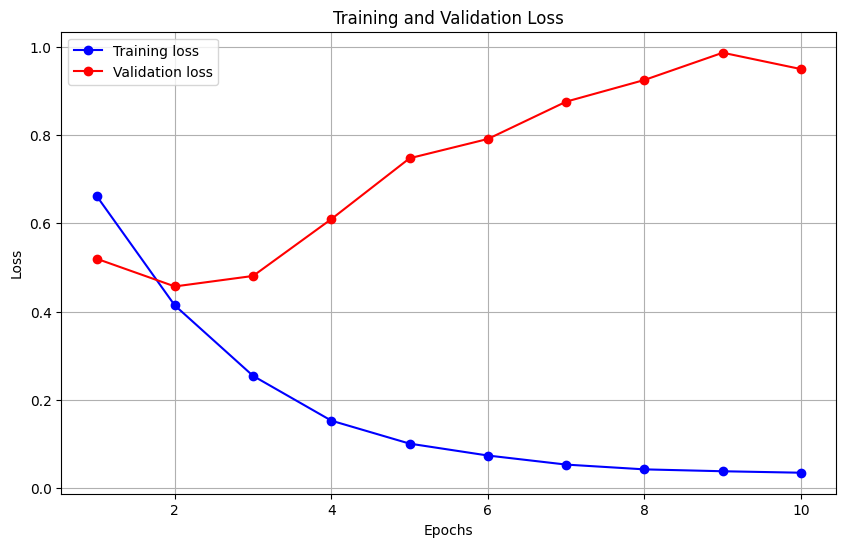

In [54]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


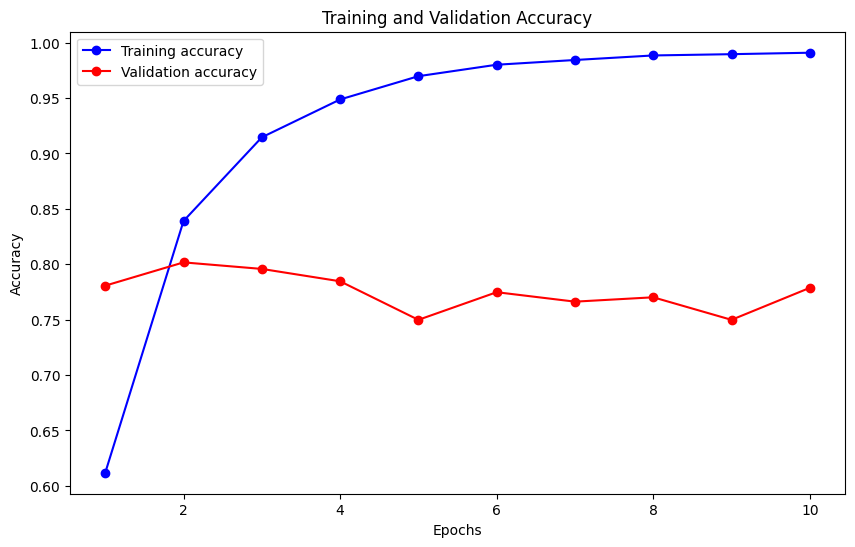

In [55]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [56]:
y_pred_train = model.predict(X_train).round()

191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step


In [57]:
y_pred_validation = model.predict(X_validation).round()

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


# Result

In [58]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        display_labels=["Not Disaster","Disaster"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()
    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_score.round(2)))

In [59]:
train_accuracy = round(metrics.accuracy_score(y_train,model.predict(X_train).round())*100, 2)


191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step


In [60]:
print("Training time: ", end_time - start_time, " seconds")

Training time:  132.46538543701172  seconds


Train Accuracy  is  :  99.41 %


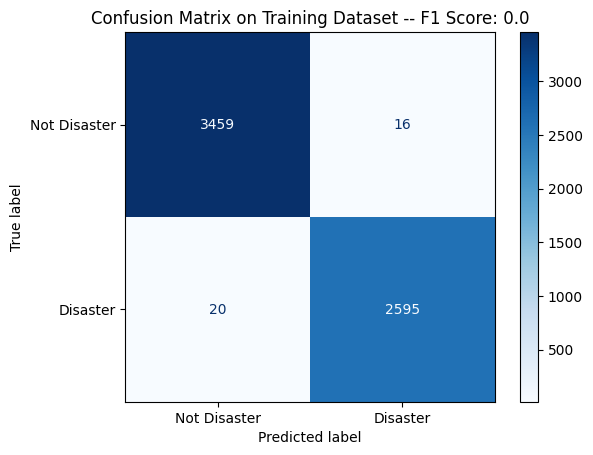

In [61]:
print('Train Accuracy  is  : ', train_accuracy, "%")
displayConfusionMatrix(y_train, y_pred_train, "Training")

Validation Accuracy  is  :  0.7787261982928431
Validation  Recall  is    :  0.7286585365853658
Validation  Precision  is :  0.750392464678179


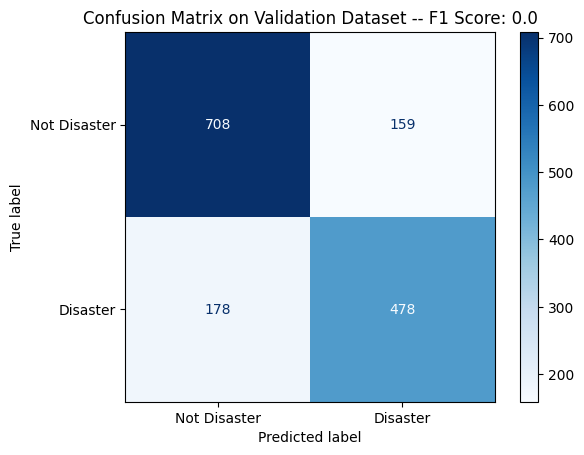

In [62]:
print('Validation Accuracy  is  : ', (metrics.accuracy_score(y_validation, y_pred_validation)))
print('Validation  Recall  is    : ', (metrics.recall_score(y_validation, y_pred_validation)))
print('Validation  Precision  is : ', (metrics.precision_score(y_validation, y_pred_validation)))
displayConfusionMatrix(y_validation, y_pred_validation, "Validation")

# Test

In [63]:
y_pred_test = model.predict(X_test).round()

102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step


In [64]:
test_accuracy = round(metrics.accuracy_score(y_test,model.predict(X_test).round())*100, 2)

102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


In [65]:
print(y_pred_test)

[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


Test Accuracy  is  :  62.18 %
Testing  Recall  is    :  0.0
Testing  Precision  is :  0.0


ValueError: not enough values to unpack (expected 4, got 1)

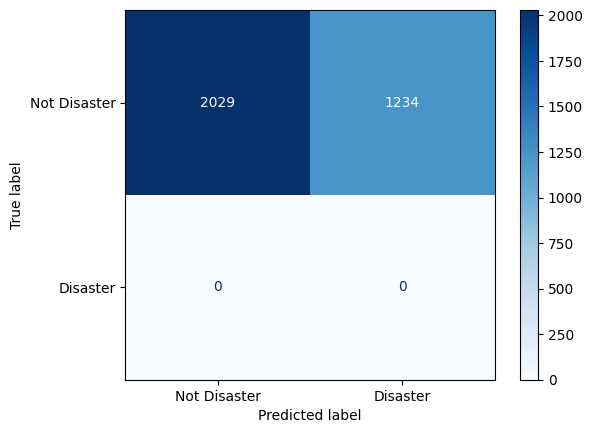

In [ ]:
print('Test Accuracy  is  : ', test_accuracy, "%")
print('Testing  Recall  is    : ', (metrics.recall_score(y_test, y_pred_test)))
print('Testing  Precision  is : ', (metrics.precision_score(y_test, y_pred_test)))
displayConfusionMatrix(y_test, y_pred_test, "Testing")

# test_ans.csv中target皆為0，因此無法計算Recall和Precision

In [67]:
y_pred_test_flat = y_pred_test.flatten()

# 創建包含 ID 和預測結果的 DataFrame
results_df = pd.DataFrame({'ID': test_data_target['id'], 'LSTM': y_pred_test_flat})

# 設定輸出 CSV 檔案的名稱
output_csv_file = 'lstm_predictions.csv'

# 將 DataFrame 寫入 CSV 檔案，不包含索引
results_df.to_csv(output_csv_file, index=False)

print(f"預測結果已寫入檔案：{output_csv_file}")

預測結果已寫入檔案：lstm_predictions.csv


In [68]:
# 讀取已經存在的 LSTM 預測結果
lstm_predictions_df = pd.read_csv('lstm_predictions.csv')

# 讀取 GRU 的預測結果
gru_predictions_df = pd.read_csv('gru_predictions.csv')

# 根據 'ID' 欄位合併兩個 DataFrame
merged_predictions_df = pd.merge(lstm_predictions_df, gru_predictions_df, on='ID', how='inner')

# 設定新的輸出檔案名稱 (包含 LSTM 和 GRU 結果)
final_output_file = 'lstm_gru_predictions.csv'

# 將合併後的 DataFrame 寫入新的 CSV 檔案，不包含索引
merged_predictions_df.to_csv(final_output_file, index=False)

print(f"LSTM 和 GRU 的預測結果已合併並儲存到檔案：{final_output_file}")

LSTM 和 GRU 的預測結果已合併並儲存到檔案：lstm_gru_predictions.csv


In [69]:
def count_model_params(model):
    total_params = model.count_params()
    print(f"總參數數量: {total_params:,}")
    return total_params




In [70]:
print("\nLSTM 模型參數數量:")
lstm_params = count_model_params(model)



LSTM 模型參數數量:
總參數數量: 5,934,465
